<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/Finding_solid_solubility_values_Relative_importance_existing_among_factors_in_Ni_binary_alloys_more_than_5_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program for regression. Finding solid solubility using hume rothery and extended parameters. For Ni alloys
-Finding solid solubility values
-Relative importance existing among factors
-more than 5 algorithms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns


# Read in data and display first 5 rows
features = pd.read_excel('/content/drive/MyDrive/Mtech project/Nickel dataset updated.xlsx')
features.head(5)
features=features.dropna()
feature=features.reset_index(drop=True)
print('The shape of our features is:', features.shape)

The shape of our features is: (59, 29)


In [ ]:
features.head()

,element,atomic radius,electronegativity of solute,Valence,Crystal\nstructure factor,a,b,c,A,B,...,Valence factor,Crystal structure\nfactor,atomic weight factor,heat of mixing,Cohesive energy,Density,Melting point,Density factor,Melting point factor,Cohesive energy factor
0,H,1.10,2.20,1,HCP,90.000,90.000,120.000,470.00,470.00,...,2.000000,HCP,0.982826,-23.0,4.38,0.000082,13.99,0.999991,0.991904,0.013514
1,Be,1.53,1.57,2,HCP,90.000,90.000,120.000,228.58,228.58,...,1.000000,HCP,0.846453,-4.0,3.32,1.850000,1560.00,0.792135,0.097222,0.252252
2,B,1.92,2.04,3,OTHER,58.053,58.053,58.053,506.00,506.00,...,0.666667,OTHER,0.815823,-24.0,5.81,2.340000,2350.00,0.737079,-0.359954,-0.308559
3,C,1.70,2.55,4,HCP,90.000,90.000,120.000,246.40,246.40,...,0.500000,HCP,0.795360,-39.0,7.37,2.200000,4098.00,0.752809,-1.371528,-0.659910
4,N,1.55,3.04,3,HCP,90.000,90.000,120.000,386.10,386.10,...,0.666667,HCP,0.761353,-69.0,4.92,0.001145,63.20,0.999871,0.963426,-0.108108


In [ ]:
features.columns

Index(['element', 'atomic radius', 'electronegativity of solute', 'Valence',
       'Crystal\nstructure factor', 'a', 'b', 'c', 'A', 'B', 'C',
       'atomic weight', 'solubility', 'atomic ra\ndius Ni',
       'electronegat\nivity of Ni', 'valence of solvent ',
       'atomic\nweight of Ni', 'atomic size factor',
       'electronegativity factor', 'Valence factor',
       'Crystal structure\nfactor', 'atomic weight factor', 'heat of mixing',
       'Cohesive energy', 'Density', 'Melting point', 'Density factor',
       'Melting point factor', 'Cohesive energy factor'],
      dtype='object')

In [ ]:
features.rename(columns={'Crystal\nstructure factor':'Crystal structure'},inplace=True)

In [ ]:
features.shape

(59, 29)

In [ ]:
features = pd.get_dummies(features, columns = ['Crystal structure (RT)2'])

In [ ]:
features=features[:59]

In [ ]:
# Create dummy variables for the catgeorical variable crystal structure
features['BCC'] = np.where(features['Crystal structure']=='BCC', 1, 0)
features['FCC'] = np.where(features['Crystal structure']=='FCC', 1, 0)
features['HCP'] = np.where(features['Crystal structure']=='HCP', 1, 0)
#dataset['ORTHOROMBIC'] = np.where(dataset['Crystal structure']=='ORTHOROMBIC', 1, 0)
#dataset['MONOCLINIC'] = np.where(dataset['Crystal structure']=='MONOCLINIC', 1, 0)
features['OTHER'] = np.where(features['Crystal structure']=='OTHER', 1, 0)
features.rename(columns={'solubility':'actual'}, inplace=True)

In [ ]:
features=features[['actual',
        'atomic size factor','electronegativity factor','Valence factor','heat of mixing',


      'BCC','FCC','HCP','OTHER' ]]#'BCC','FCC','HCP','OTHER','Density factor','Melting point factor','Abs Density factor','Abs Melting point factor','Abs atomic weight factor',


In [ ]:
features.rename(columns={'Solubility':'actual'}, inplace=True)

In [ ]:
features.rename(columns={'Solubility':'actual','Crystal structure (RT)2_BCC':'BCC','Crystal structure (RT)2_BCT':'BCT','Crystal structure (RT)2_Base Centered Orthorhombic':'BCO','Crystal structure (RT)2_DC':'DC','Crystal structure (RT)2_DHCP':'DHCP','Crystal structure (RT)2_FCC':'FCC','Crystal structure (RT)2_HCP':'HCP','Crystal structure (RT)2_Rhombohedral ':'RH','Crystal structure (RT)2_Trigonal':'TRI'}, inplace=True)

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
feature= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(feature.columns)
# Convert to numpy array
feature = np.array(feature)

In [ ]:
X=feature
y=labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_preds = linear_regression.predict(X_test)
linear_preds_train = linear_regression.predict(X_train)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
tree_preds = decision_tree.predict(X_test)
tree_preds_train=decision_tree.predict(X_train)

# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
forest_preds = random_forest.predict(X_test)
forest_preds_train = random_forest.predict(X_train)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)
svr_preds_train = svr.predict(X_train)

Linear regression , Training :  0.2651846944424693
Linear regression Test, :  0.23995151770309653


<Axes: >

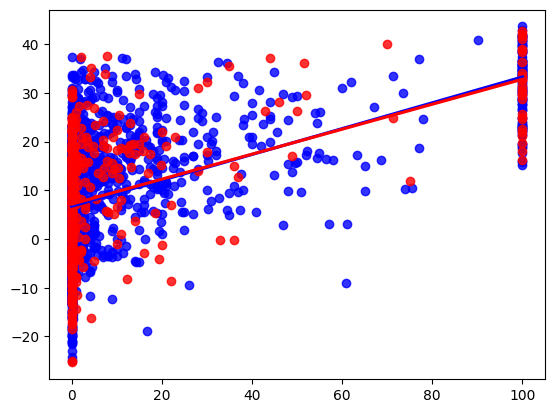

In [ ]:
print('Linear regression , Training : ', r2_score(y_train, linear_preds_train))
print('Linear regression Test, : ', r2_score(y_test, linear_preds))
sns.regplot(x=y_train, y=linear_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=linear_preds, ci=None, color="r")

DTR , Training :  1.0
DTR , Test :  0.7082820074673877


<Axes: >

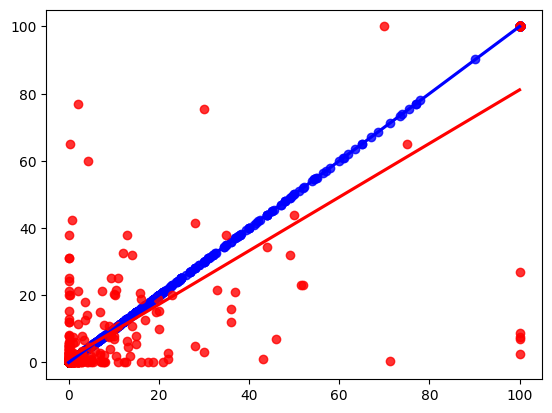

In [ ]:
print('DTR , Training : ', r2_score(y_train, tree_preds_train))
print('DTR , Test : ', r2_score(y_test, tree_preds))
sns.regplot(x=y_train, y=tree_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=tree_preds, ci=None, color="r")

Random Forest , Training :  0.9671318465869274
Random Forest, Test :  0.7684337209210869


<Axes: >

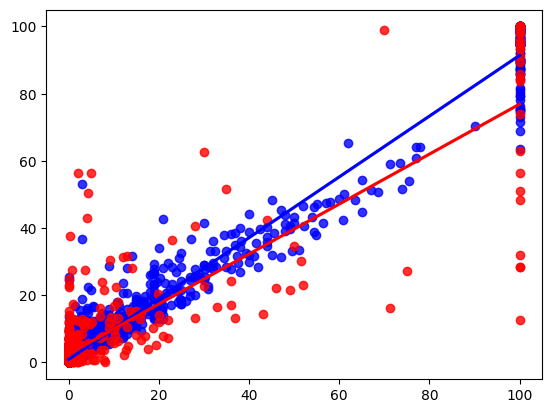

In [ ]:
print('Random Forest , Training : ', r2_score(y_train, forest_preds_train))
print('Random Forest, Test : ', r2_score(y_test, forest_preds))
sns.regplot(x=y_train, y=forest_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=forest_preds, ci=None, color="r")

SVR , Training :  0.027216971294877434
SVR , Test :  0.038736308904458006


<Axes: >

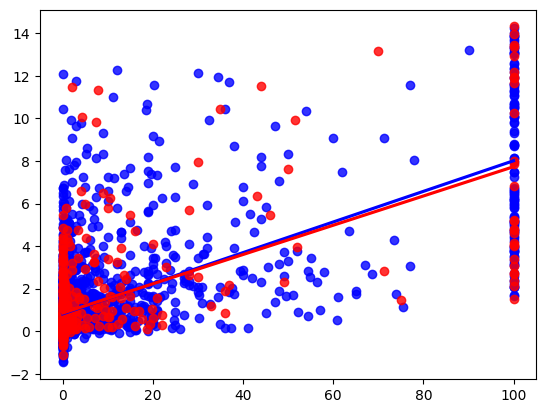

In [ ]:
print('SVR , Training : ', r2_score(y_train, svr_preds_train))
print('SVR , Test : ', r2_score(y_test, svr_preds))
sns.regplot(x=y_train, y=svr_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=svr_preds, ci=None, color="r")

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
#X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the SVR model
svr = SVR()

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Make predictions using the best SVR model
svr_preds = best_svr.predict(X_test)

# Calculate Mean Squared Error
svr_mse = mean_squared_error(y_test, svr_preds)

# Print the best SVR model and MSE
print('Best SVR Model:', best_svr)
print('SVR MSE:', svr_mse)


Best SVR Model: SVR(C=10, epsilon=1)
SVR MSE: 346.6104009370219


In [ ]:
svr_preds = best_svr.predict(X_test)
svr_preds_train = best_svr.predict(X_train)

SVR , Training :  0.27514386884469033
SVR , Test :  0.33136473017134505


<Axes: >

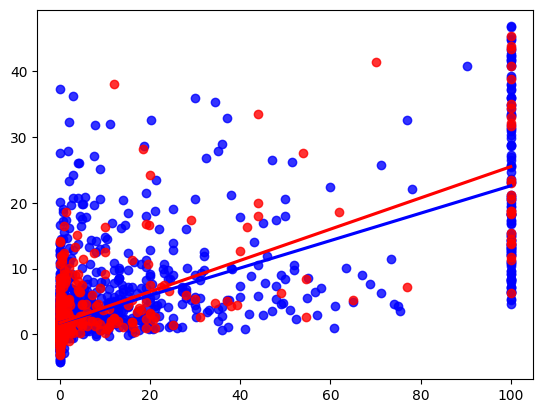

In [ ]:
print('SVR , Training : ', r2_score(y_train, svr_preds_train))
print('SVR , Test : ', r2_score(y_test, svr_preds))
sns.regplot(x=y_train, y=svr_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=svr_preds, ci=None, color="r")

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Generate a random regression dataset
#X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the testing set
xgb_preds = xgb_regressor.predict(X_test)
xgb_preds_train = xgb_regressor.predict(X_train)
# Calculate Mean Squared Error
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mse_train = mean_squared_error(y_train, xgb_preds_train)
# Print the MSE
print('XGBoost Regressor MSE:', xgb_mse)
print('XGBoost Regressor MSE train:', xgb_mse_train)


XGBoost Regressor MSE: 184.488323195782
XGBoost Regressor MSE train: 1.8314617720596384


XGB , Training :  0.9967351839779443
XGB , Test :  0.6725496502952724


<Axes: >

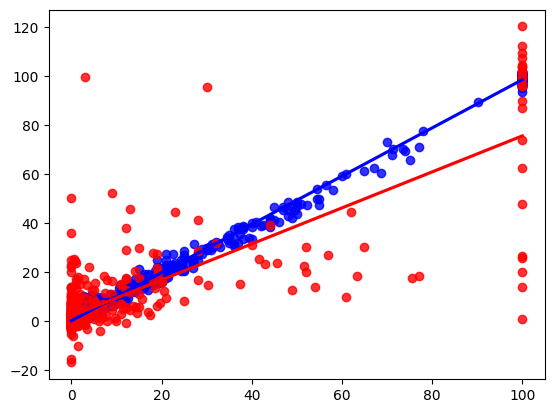

In [ ]:
print('XGB , Training : ', r2_score(y_train, xgb_preds_train))
print('XGB , Test : ', r2_score(y_test, xgb_preds))
sns.regplot(x=y_train, y=xgb_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=xgb_preds, ci=None, color="r")

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data stored in `X` and `y` arrays

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature selection
k = 5  # Number of top features to select

selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Subset the original feature names based on the selected feature indices
selected_feature_names = [feature_list[i] for i in selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Step 4: Model evaluation on testing set
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Step 5: Ensembling using bagging
n_estimators = 10  # Number of base models (random forest regressors)
max_samples = 0.8  # Percentage of samples used for training each base model
base_model = RandomForestRegressor(random_state=42, **best_params)
ensemble_model = BaggingRegressor(base_model, n_estimators=n_estimators, max_samples=max_samples)
ensemble_model.fit(X_train_selected, y_train)
y_pred = ensemble_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ensemble Mean Squared Error (MSE):", mse)
print("Ensemble Root Mean Squared Error (RMSE):", rmse)
print("Ensemble R-squared (R2):", r2)

# Step 6: Optional regularization (if needed)
max_depth = 5  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node

regularized_model = RandomForestRegressor(random_state=42, **best_params,
                                         max_depth=max_depth,
                                          min_samples_split=min_samples_split,
                                          min_samples_leaf=min_samples_leaf)
regularized_model.fit(X_train_selected, y_train)
y_pred = regularized_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regularized Mean Squared Error (MSE):", mse)
print("Regularized Root Mean Squared Error (RMSE):", rmse)
print("Regularized R-squared (R2):", r2)

# Step 7: Optional cross-validation
cv_scores = cross_val_score(regularized_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

mean_cv_rmse = np.mean(cv_rmse_scores)
std_cv_rmse = np.std(cv_rmse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", mean_cv_rmse)
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)


Selected Features: ['Heat of mixing', 'Atomic size factor', 'electronegativity diff2', 'Valence Diff', 'crystal structure weightage factor']
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 388.9183072231249
Root Mean Squared Error (RMSE): 19.72101182047019
R-squared (R2): 0.7090574763210635
Ensemble Mean Squared Error (MSE): 370.7554209192648
Ensemble Root Mean Squared Error (RMSE): 19.25501028094415
Ensemble R-squared (R2): 0.7226447924242034


TypeError: ignored

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data stored in `X` and `y` arrays

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature selection
k = 5  # Number of top features to select

selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Subset the original feature names based on the selected feature indices
selected_feature_names = [feature_list[i] for i in selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Step 4: Model evaluation on testing set
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Step 5: Ensembling using bagging
n_estimators = 10  # Number of base models (random forest regressors)
max_samples = 0.8  # Percentage of samples used for training each base model
base_model = RandomForestRegressor(random_state=42, **best_params)
ensemble_model = BaggingRegressor(base_model, n_estimators=n_estimators, max_samples=max_samples)
ensemble_model.fit(X_train_selected, y_train)
y_pred = ensemble_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ensemble Mean Squared Error (MSE):", mse)
print("Ensemble Root Mean Squared Error (RMSE):", rmse)
print("Ensemble R-squared (R2):", r2)

# Step 6: Optional regularization (if needed)

# Step 7: Optional cross-validation
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

mean_cv_rmse = np.mean(cv_rmse_scores)
std_cv_rmse = np.std(cv_rmse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", mean_cv_rmse)
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)


Selected Features: ['Heat of mixing', 'Atomic size factor', 'electronegativity diff2', 'Valence Diff', 'crystal structure weightage factor']
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 388.9183072231249
Root Mean Squared Error (RMSE): 19.72101182047019
R-squared (R2): 0.7090574763210635
Ensemble Mean Squared Error (MSE): 386.69356947615194
Ensemble Root Mean Squared Error (RMSE): 19.664525661102328
Ensemble R-squared (R2): 0.7107217610888588
Cross-Validation RMSE Scores: [20.27275936 16.63865015 20.02887178 21.64554041 16.11336317]
Mean Cross-Validation RMSE: 18.939836975354996
Standard Deviation of Cross-Validation RMSE: 2.1710792233247904


In [ ]:
X=features[['actual','Abs metallic size factor',
       'Abs electronegativity factor', 'Valency factor',
        'heat of mixing',
       'BCC','FCC','HCP','OTHER',]]##'BCC','FCC','HCP','OTHER',
#y=labels

In [ ]:
X.rename(columns={'actual':'SL','Abs metallic size factor':'AS','Abs electronegativity factor':'EN','Valency factor':'VF','Abs atomic weight factor':'AW','Abs Melting point factor':'MP','Abs Density factor':'DF', 'heat of mixing':'HM'}, inplace=True)

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr = X.corr(method="spearman")
corr.style.background_gradient(cmap='Blues').set_precision(2)
#corr.style.background_gradient(cmap='coolwarm')

<ipython-input-19-d7f947e8d2bd>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='Blues').set_precision(2)


,SL,AS,EN,VF,HM,BCC,FCC,HCP,OTHER
SL,1.00,-0.47,-0.25,-0.27,-0.20,0.10,-0.15,0.04,-0.00
AS,-0.47,1.00,0.49,0.15,0.11,0.01,0.15,0.01,-0.19
EN,-0.25,0.49,1.00,0.54,0.55,-0.07,0.37,-0.43,0.22
VF,-0.27,0.15,0.54,1.00,0.54,-0.06,0.23,-0.36,0.27
HM,-0.20,0.11,0.55,0.54,1.00,-0.25,0.33,-0.26,0.27
BCC,0.10,0.01,-0.07,-0.06,-0.25,1.00,-0.30,-0.44,-0.27
FCC,-0.15,0.15,0.37,0.23,0.33,-0.30,1.00,-0.39,-0.24
HCP,0.04,0.01,-0.43,-0.36,-0.26,-0.44,-0.39,1.00,-0.34
OTHER,-0.00,-0.19,0.22,0.27,0.27,-0.27,-0.24,-0.34,1.00


In [ ]:
def display_correlation(df):
    r = df.corr(method="spearman").round(2)
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="spearman").round(2), vmin=-1,
                      vmax=1, annot=True)
    plt.title("spearman Correlation")
    return(r)

,SL,AS,EN,VF,HM,BCC,FCC,HCP,OTHER
SL,1.00,-0.47,-0.25,-0.27,-0.20,0.10,-0.15,0.04,-0.00
AS,-0.47,1.00,0.49,0.15,0.11,0.01,0.15,0.01,-0.19
EN,-0.25,0.49,1.00,0.54,0.55,-0.07,0.37,-0.43,0.22
VF,-0.27,0.15,0.54,1.00,0.54,-0.06,0.23,-0.36,0.27
HM,-0.20,0.11,0.55,0.54,1.00,-0.25,0.33,-0.26,0.27
BCC,0.10,0.01,-0.07,-0.06,-0.25,1.00,-0.30,-0.44,-0.27
FCC,-0.15,0.15,0.37,0.23,0.33,-0.30,1.00,-0.39,-0.24
HCP,0.04,0.01,-0.43,-0.36,-0.26,-0.44,-0.39,1.00,-0.34
OTHER,-0.00,-0.19,0.22,0.27,0.27,-0.27,-0.24,-0.34,1.00


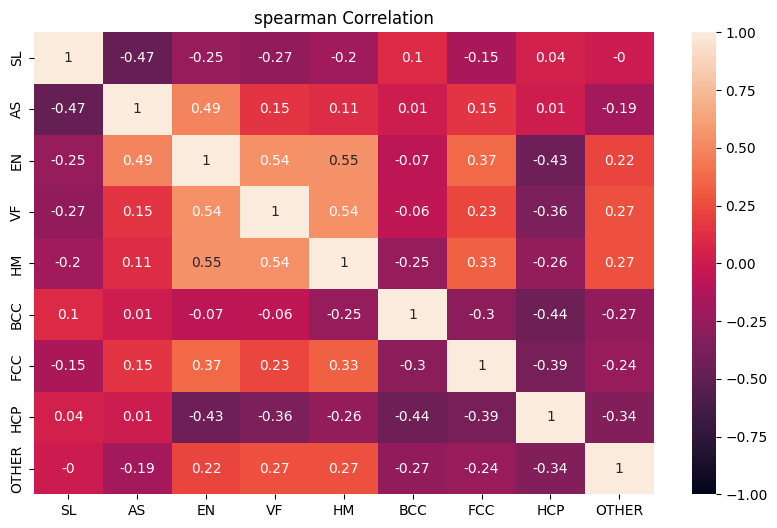

In [ ]:
display_correlation(X)

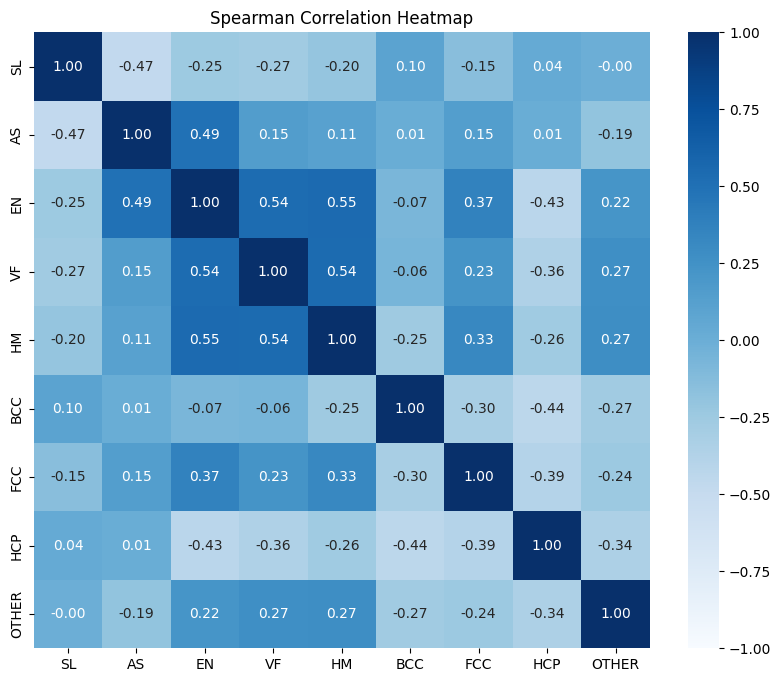

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample dataset
# data = pd.DataFrame({
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1],
#     'C': [2, 4, 6, 8, 10],
#     'D': [10, 8, 6, 4, 2]
# })

# Calculate the Spearman correlation matrix
corr_matrix = X.corr(method='spearman')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True,vmin=-1,
                      vmax=1,)

# Set the title and display the plot
plt.title('Spearman Correlation Heatmap')
plt.show()

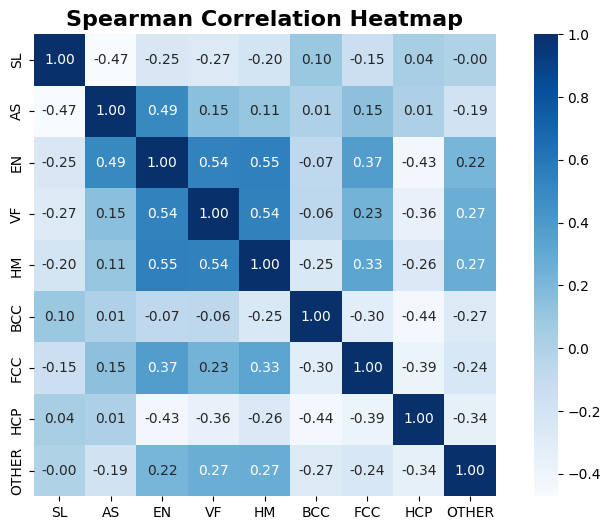

In [ ]:
import matplotlib.font_manager as font_manager
# Calculate the Spearman correlation matrix
corr_matrix = X.corr(method='spearman')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True)

# Set the font properties
title_font = {'fontname': 'Arial', 'size': '16', 'weight': 'bold'}
annot_font = font_manager.FontProperties(family='Arial', style='normal', size=10)

# Set the title and annotation fonts
heatmap.set_title('Spearman Correlation Heatmap', **title_font)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontproperties=annot_font)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontproperties=annot_font)

# Display the plot
plt.show()

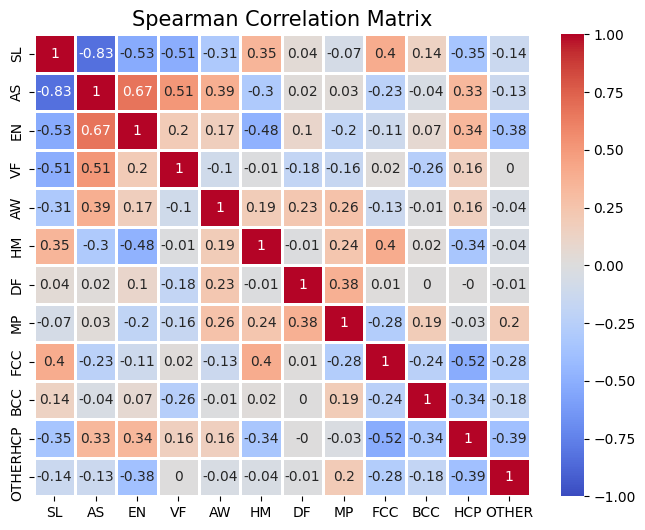

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Generate random data
# np.random.seed(0)
# data = np.random.randn(10, 10)

# Compute Spearman correlation matrix
corr_matrix = pd.DataFrame(X).corr(method='spearman').round(2)

# 'Set the font to Arial in matplotlib'
# 'plt.rcParams['font.family'] = 'Times New Roman''

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, vmin=-1,
                      vmax=1)
plt.title('Spearman Correlation Matrix', fontsize=15)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# random_seed = 42
# np.random.seed(random_seed)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feature, labels, test_size = 0.25, random_state = 0)#random_seed

In [ ]:
# Transforming data
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (44, 8)
Training Labels Shape: (44,)
Testing Features Shape: (15, 8)
Testing Labels Shape: (15,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf =RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=67)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
RandomForestRegressor(bootstrap=False, max_depth=9, max_features='sqrt',
                      min_samples_split=5, n_estimators=34)
RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_split=5, n_estimators=278)
RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_split=5, n_estimators=278).
RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=3,
                      n_estimators=56)
RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=67)
RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=67,random_state=32)
#for Ni dataset best accuracy  >>>>>>>>                 RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
#                       min_samples_split=3, n_estimators=67)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_split=5, n_estimators=278)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf, test_features,test_labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.8275582043595847
Accuracy for the fold no. 1 on the test set: 0.7708586534919156
Accuracy for the fold no. 2 on the test set: 0.8711899089785654
Accuracy for the fold no. 3 on the test set: -595.6618141892175
Accuracy for the fold no. 4 on the test set: -0.1675471139803828


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6.49 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


<ipython-input-312-f46941e48193>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
from sklearn.metrics import r2_score
predictions_train = rf.predict(train_features)
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(train_labels, predictions_train)

83.61610967601452

In [ ]:
mean_squared_error(test_labels, predictions)

78.63618690993071

In [ ]:
r2_score(train_labels, predictions_train)

0.9385379791621898

In [ ]:
r2_score(test_labels, predictions)

0.8750677186789214

<ipython-input-318-add541f7fceb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train_labels, hist=False, color="r", label="Actual Value")
<ipython-input-318-add541f7fceb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions_train, hist=False, color="b", label="

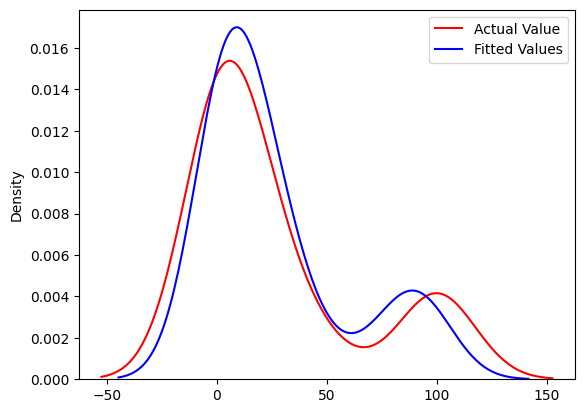

In [ ]:
import seaborn as sns

ax1 = sns.distplot(train_labels, hist=False, color="r", label="Actual Value")
sns.distplot(predictions_train, hist=False, color="b", label="Fitted Values",ax=ax1 )
plt.legend()
plt.show()

<ipython-input-319-56bc30973f25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
<ipython-input-319-56bc30973f25>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, hist=False, color="b", label="Fitted 

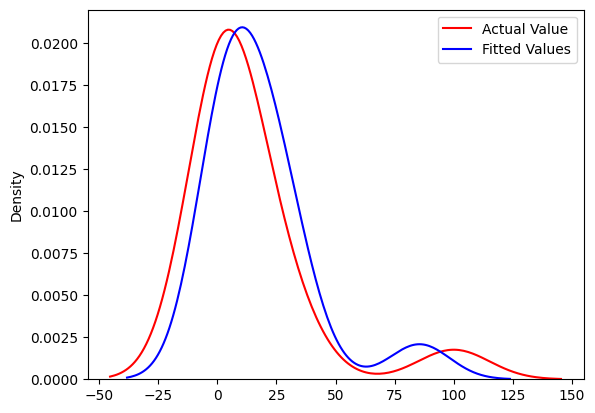

In [ ]:
import seaborn as sns

ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values",ax=ax1 )
plt.legend()
plt.show()

<Axes: >

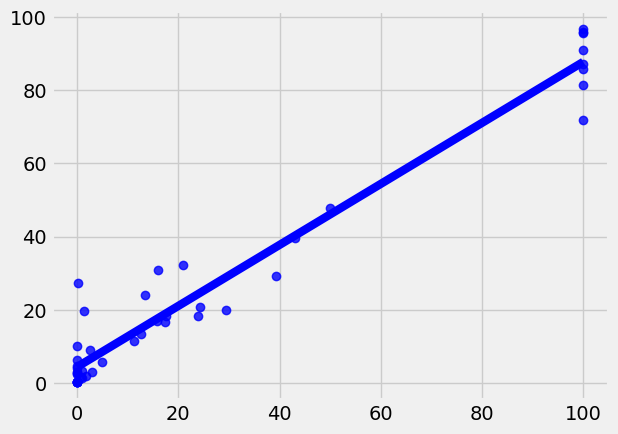

In [ ]:
sns.regplot(x=train_labels, y=predictions_train, ci=None, color="b")

<Axes: >

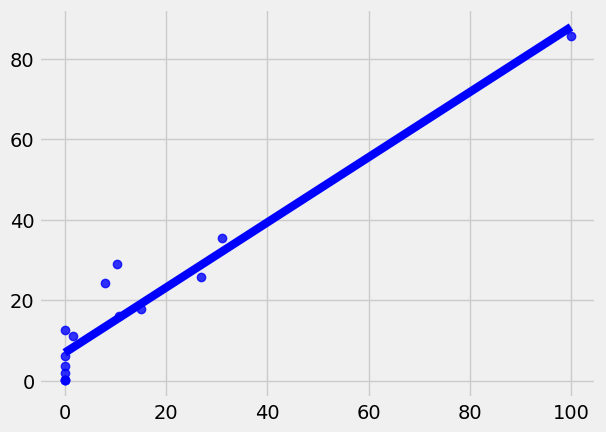

In [ ]:
sns.regplot(x=test_labels, y=predictions, ci=None, color="b")

<Axes: >

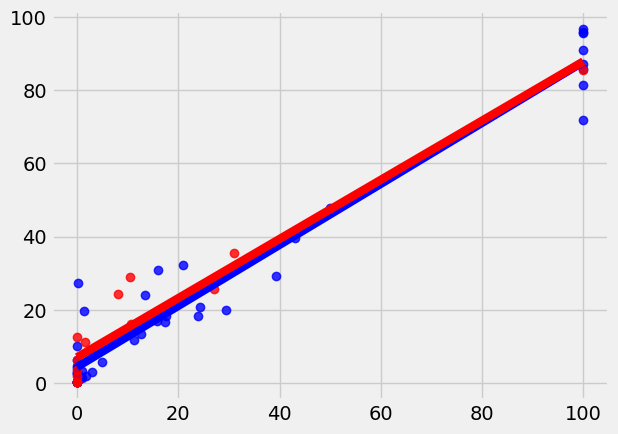

In [ ]:
sns.regplot(x=train_labels, y=predictions_train, ci=None, color="b")
sns.regplot(x=test_labels, y=predictions, ci=None, color="r")

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=1000, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: atomic size factor   Importance: 0.25
Variable: FCC                  Importance: 0.23
Variable: heat of mixing       Importance: 0.21
Variable: electronegativity factor Importance: 0.17
Variable: Valence factor       Importance: 0.07
Variable: HCP                  Importance: 0.05
Variable: OTHER                Importance: 0.02
Variable: BCC                  Importance: 0.01


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=0)
# Extract the two most important features
important_indices = [feature_list.index('metallic size factor'), feature_list.index('electronegativity factor'),feature_list.index('HCP'),feature_list.index('heat of mixing'),feature_list.index('Valency factor')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

ValueError: ignored

In [ ]:
predictions_train = rf_most_important.predict(train_important)

NameError: ignored

In [ ]:
mean_squared_error(train_labels, predictions_train)

35.89336366793352

In [ ]:
mean_squared_error(test_labels, predictions)

138.3969403098575

In [ ]:
r2_score(test_labels, predictions)

0.5687640585169254

In [ ]:
r2_score(train_labels, predictions_train)

0.9425690961351413

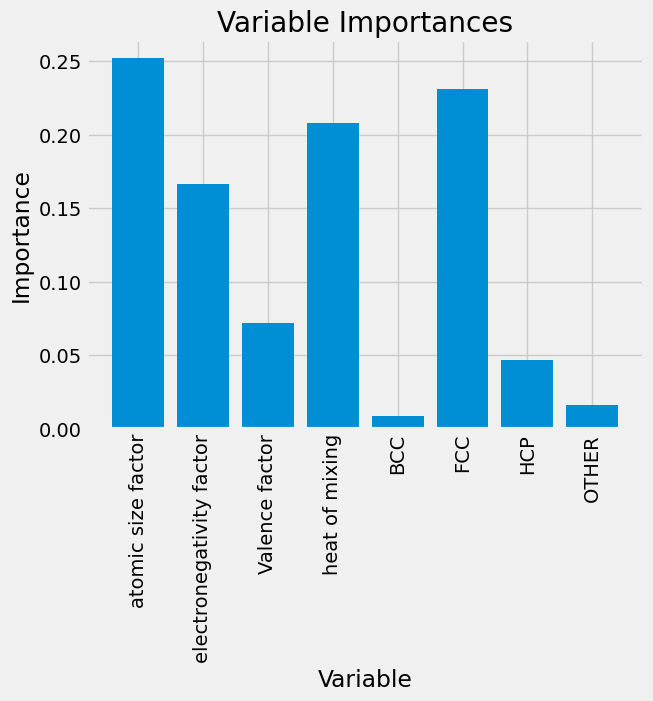

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
import numpy as np

In [ ]:
a=np.random.randn(2,2)
b=np.random.randn(2,1)
a+b

array([[ 2.67026821,  0.39918992],
       [ 0.64975706, -3.09614285]])

In [ ]:
 # Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: atomic size factor   Importance: 0.25
Variable: FCC                  Importance: 0.23
Variable: heat of mixing       Importance: 0.21
Variable: electronegativity factor Importance: 0.17
Variable: Valence factor       Importance: 0.07
Variable: HCP                  Importance: 0.05
Variable: OTHER                Importance: 0.02
Variable: BCC                  Importance: 0.01


[None, None, None, None, None, None, None, None]

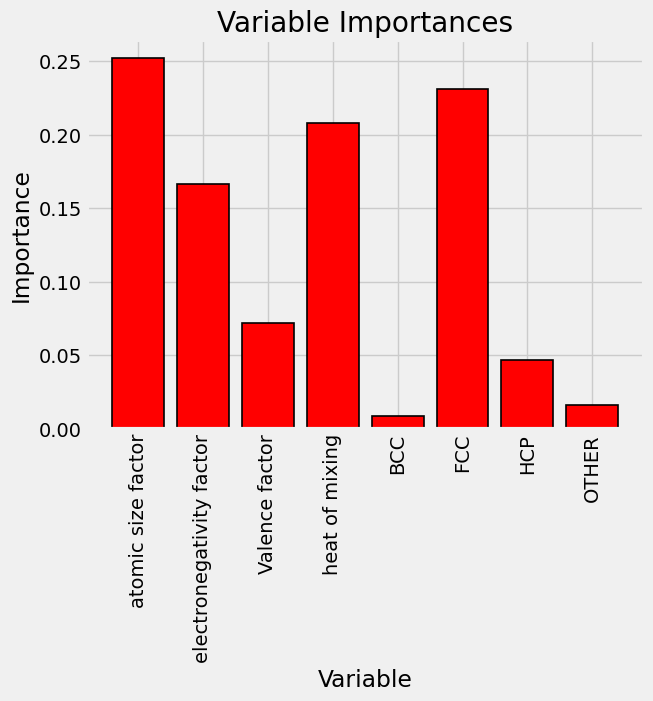

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Generate a random regression dataset
#X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the testing set
xgb_preds = xgb_regressor.predict(X_test)
xgb_preds_train = xgb_regressor.predict(X_train)
# Calculate Mean Squared Error
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mse_train = mean_squared_error(y_train, xgb_preds_train)
# Print the MSE
print('XGBoost Regressor MSE:', xgb_mse)
print('XGBoost Regressor MSE train:', xgb_mse_train)


XGBoost Regressor MSE: 1183.5658255871592
XGBoost Regressor MSE train: 7.107835133344611e-07


XGB , Training :  0.9999999994002647
XGB , Test :  0.07257317037978472


<Axes: >

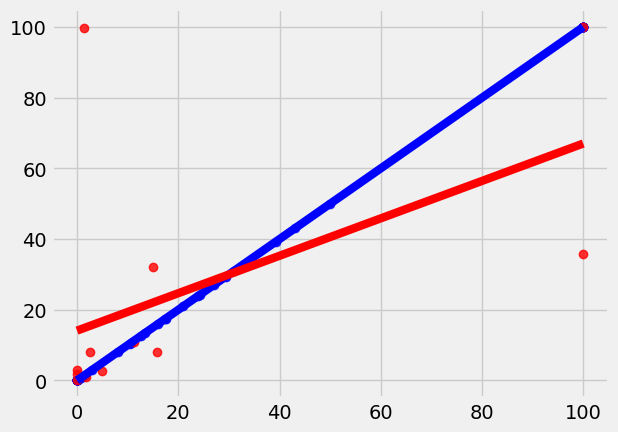

In [ ]:
print('XGB , Training : ', r2_score(y_train, xgb_preds_train))
print('XGB , Test : ', r2_score(y_test, xgb_preds))
sns.regplot(x=y_train, y=xgb_preds_train, ci=None, color="b")
sns.regplot(x=y_test, y=xgb_preds, ci=None, color="r")

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

NameError: ignored

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:2]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1981, 2)
Important test features shape: (661, 2)


In [ ]:
# Train the expanded model on only the important features
rf.fit(important_train_features, train_labels);
# Make predictions on test data
predictions = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions - test_labels)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 7.24 degrees.
Accuracy: nan %.


<ipython-input-116-6bee6b85fa70>:9: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)
<ipython-input-116-6bee6b85fa70>:9: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
r2_score(test_labels, predictions)

0.3622909955477789

In [ ]:
predictions_train = rf.predict(important_train_features)

In [ ]:
r2_score(train_labels, predictions_train)

0.8265111854797773

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: metallic size factor Importance: 0.86
Variable: electronegativity factor Importance: 0.14


[None, None]

ValueError: ignored

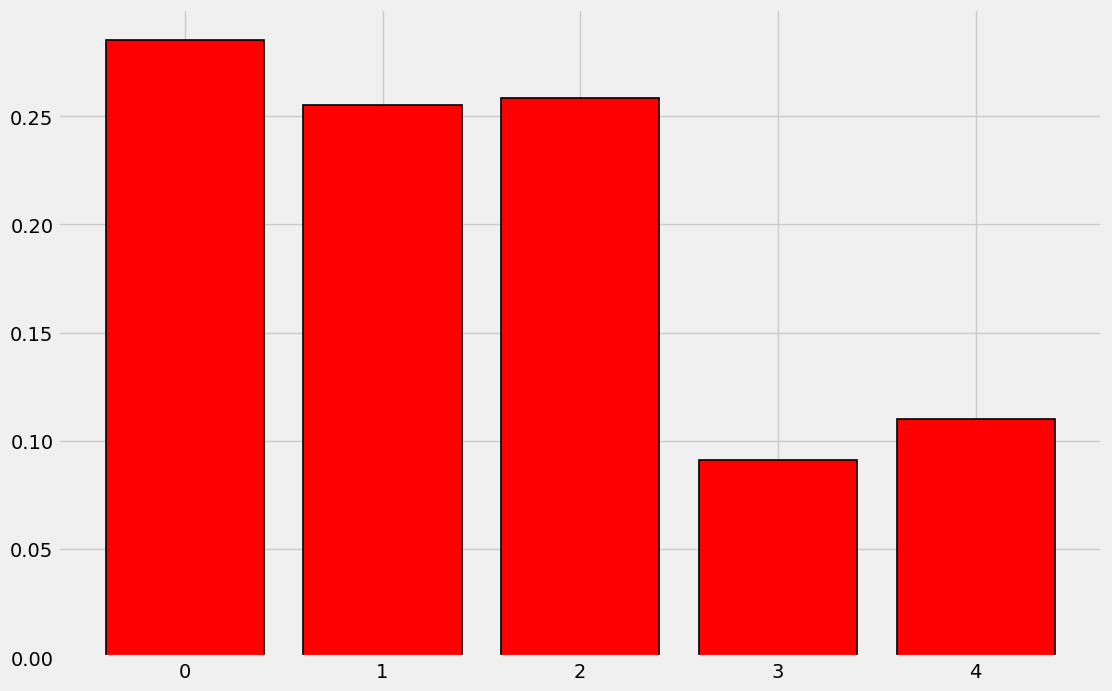

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5,6,7,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
 'n_estimators': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=32, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [1, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   random_state=32, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=67)

In [ ]:
best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy)

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [False],
    'max_depth': [2, 10],
    'max_features': [2, 8],
    'min_samples_leaf': [2, 8],
    'min_samples_split': [2, 6],
    'n_estimators': [10, 20, 30, 40, 50,100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [2, 10],
                         'max_features': [2, 8], 'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             verbose=2)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
rf = RandomForestRegressor(
                           n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           random_state = 0)

rf.fit(train_features, train_labels)

n_scores = cross_val_score(rf, train_features, train_labels,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1)).mean()

In [ ]:
n_scores

-0.11300172479449996

In [ ]:
grid_search.score(test_features,test_labels)

0.33269756693072894

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf =RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
r2_score(train_labels, predictions_train)

0.8828552554903825

In [ ]:
r2_score(test_labels, predictions)


0.37529532785365627